В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром .  
В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.
Обучите классификатор при C = 0.72 и random_state = 5 на предложенной выборке. Используйте параметр random_state = 5 для разделения выборки на тренировочную и тестовую части, в отношении 75/25.

Введите значение коэффициента 0 242 построенной гиперплоскости.
Введите значение коэффициента 0 449 построенной гиперплоскости.
Введите значение коэффициента  0 76 построенной гиперплоскости.
Значение коэффициента  округлите до сотых
Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики  для каждого класса: F1 = 2*(presicion*recall)/(presicion+ recall)
Введите среднее значение метрик  (Macro-F1):
Ответ округлите до сотых
Выполните предсказание для изображений, указанных ниже. Введите назначенный класс: 0 или 1.

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

from os import listdir # Библиотека для получения списка файлов
from os.path import isfile, join

Для работы с изображениями, найдем их гистограммы — характеристики распределения интенсивности изображения. Для этого можно воспользоваться следующим методом.

In [101]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Считаем изображения из корневой папки train и вычислим гистограмму каждого изображения. Кроме того, отделим метку каждого изображения. 

In [102]:
dir = '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/train'

In [103]:
imagePaths = sorted(list(paths.list_images('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Преобразуем метки в удобный формат 0 и 1 и посмотрим, какой код и какая метка соответствует самой первой попавшейся нам картинке 

0


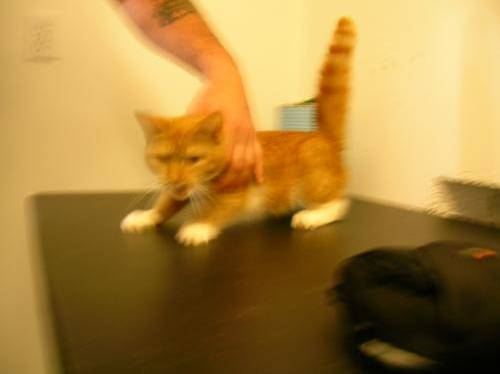

In [104]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Видно, что классом ноль у нас занумерованы коты (кошки).
Разделим выборку на тренировочную и тестовую в отношении 75/25 с параметром random_state = 5.

In [105]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=5)

Теперь обучим модель почти-разделяющий гиперплосоксти на наших данных, а также оценим ее на тестовых. Параметр C обратно пропорционален параметру модели, про который говорилось в лекции.

In [106]:
model = LinearSVC(random_state = 5, C = 0.72)
model.fit(trainData, trainLabels)

LinearSVC(C=0.72, random_state=5)

In [107]:
predictions = model.predict(testData)

In [108]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.51      0.70      0.59       115
         dog       0.63      0.44      0.52       135

    accuracy                           0.56       250
   macro avg       0.57      0.57      0.55       250
weighted avg       0.57      0.56      0.55       250



In [109]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5528448734269003

Выведем коэффициент $\theta_1$ построенной гиперплоскости. Обращаем внимание, что в поле `coef_` хранятся тета, начиная с $\theta_1$. Свободный член $\theta_0$ хранится в отдельном поле `.intercept_`.

In [110]:
model.coef_[0][0]

-0.24456878579376984

In [111]:
model.coef_[0][242]

-0.0037454996460935547

In [112]:
model.coef_[0][449]

0.0

In [113]:
model.coef_[0][75]

0.3616986770050227

Вычислим предсказания для объекта из папки test


In [114]:
test = '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test'
test_dog = '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/dog.1021.jpg'

In [115]:
singleImage = cv2.imread('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/dog.1021.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

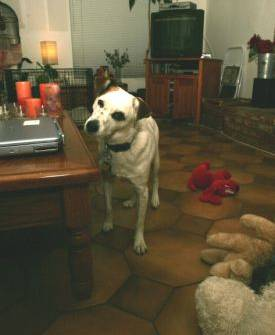

In [116]:
Image(filename= '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/dog.1016.jpg')

In [117]:
prediction

array([0])

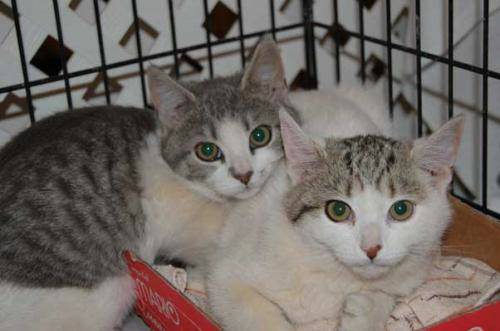

In [118]:
Image(filename= '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/cat.1032.jpg')

In [119]:
prediction

array([0])

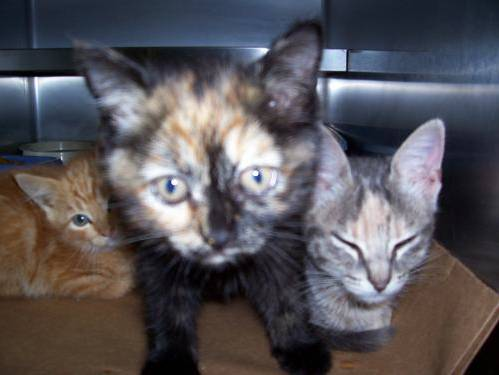

In [120]:
Image(filename= '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/cat.1046.jpg')

In [121]:
prediction

array([0])

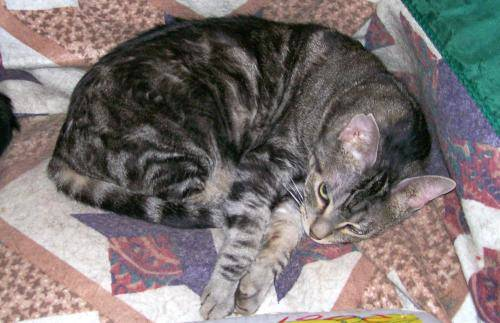

In [122]:
Image(filename= '/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ dataset_IZ_32_SVM/test/cat.1028.jpg')

In [123]:
prediction

array([0])